In [53]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-online-course-engagement-dataset/online_course_engagement_data.csv


In [54]:
df=pd.read_csv('/kaggle/input/predict-online-course-engagement-dataset/online_course_engagement_data.csv')


In [4]:
df.head()

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0


In [5]:
df.shape

(9000, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UserID                 9000 non-null   int64  
 1   CourseCategory         9000 non-null   object 
 2   TimeSpentOnCourse      9000 non-null   float64
 3   NumberOfVideosWatched  9000 non-null   int64  
 4   NumberOfQuizzesTaken   9000 non-null   int64  
 5   QuizScores             9000 non-null   float64
 6   CompletionRate         9000 non-null   float64
 7   DeviceType             9000 non-null   int64  
 8   CourseCompletion       9000 non-null   int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 632.9+ KB


In [55]:
#Dropping user ID column as it does not contribute to the prediction of the target variable
df.drop(columns="UserID",inplace=True)

In [25]:
df["CourseCategory"].unique()

array(['Health', 'Arts', 'Science', 'Programming', 'Business'],
      dtype=object)

In [56]:
#checking for missing values
df.isnull().sum()


CourseCategory           0
TimeSpentOnCourse        0
NumberOfVideosWatched    0
NumberOfQuizzesTaken     0
QuizScores               0
CompletionRate           0
DeviceType               0
CourseCompletion         0
dtype: int64

In [57]:
##checking for duplicated rows
df.duplicated().sum()

877

In [58]:
# Retaining the first occurrence of the duplicated rows and deleting the remaining occurrences
df = df.drop_duplicates(keep='first')

In [59]:
df.duplicated().sum()

0

In [32]:
df.describe()

,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
count,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000
mean,50.607728,10.148098,5.166933,75.091084,51.190873,0.500431,0.439247
std,28.364184,5.987972,3.132108,14.339876,29.069716,0.500031,0.496326
min,1.005230,0.000000,0.000000,50.005119,0.009327,0.000000,0.000000
25%,26.114631,5.000000,2.000000,62.791226,26.276765,0.000000,0.000000
50%,50.316921,10.000000,5.000000,75.273913,51.581186,1.000000,0.000000
75%,75.377730,15.000000,8.000000,87.497542,76.729629,1.000000,1.000000
max,99.992558,20.000000,10.000000,99.994984,99.979711,1.000000,1.000000


**Exploratory Data Analysis**

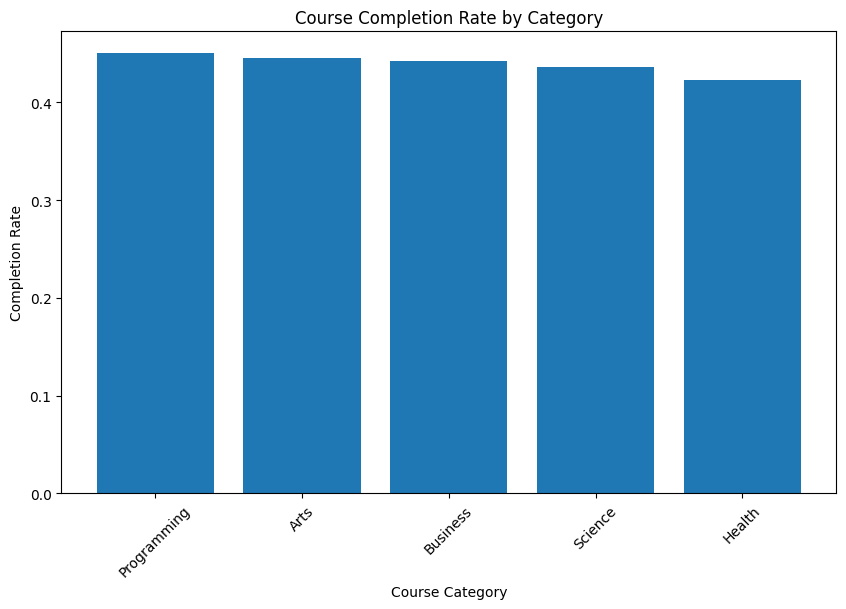

Course completion rates by category:
CourseCategory
Programming    0.450092
Arts           0.445223
Business       0.442366
Science        0.435850
Health         0.422889
Name: CourseCompletion, dtype: float64


In [66]:
#Course category analysis

completion_category = df.groupby('CourseCategory')['CourseCompletion'].mean().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(completion_category.index, completion_category.values)
plt.title('Course Completion Rate by Category')
plt.xlabel('Course Category')
plt.ylabel('Completion Rate')
plt.xticks(rotation=45)
plt.show()
print('Course completion rates by category:')
print(completion_category)

Courses in Programming, Arts and Business have slightly more completion rates compared to the other categories like Science and Health

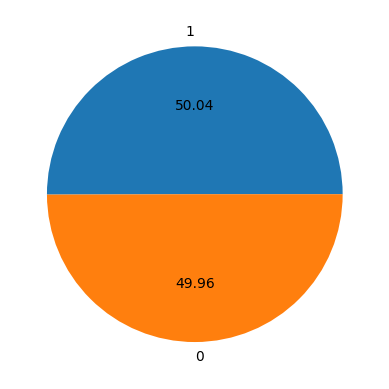

In [67]:
#Device Type analysis
import matplotlib.pyplot as plt
counts=df["DeviceType"].value_counts()
indexes=counts.index
plt.pie(counts,labels=indexes,autopct="%.2f")
plt.show()

Both mobile and desktop devices are equally being used for course completion by the users. Usage of desktop devices is just a percent lower compared to the mobile device usage.

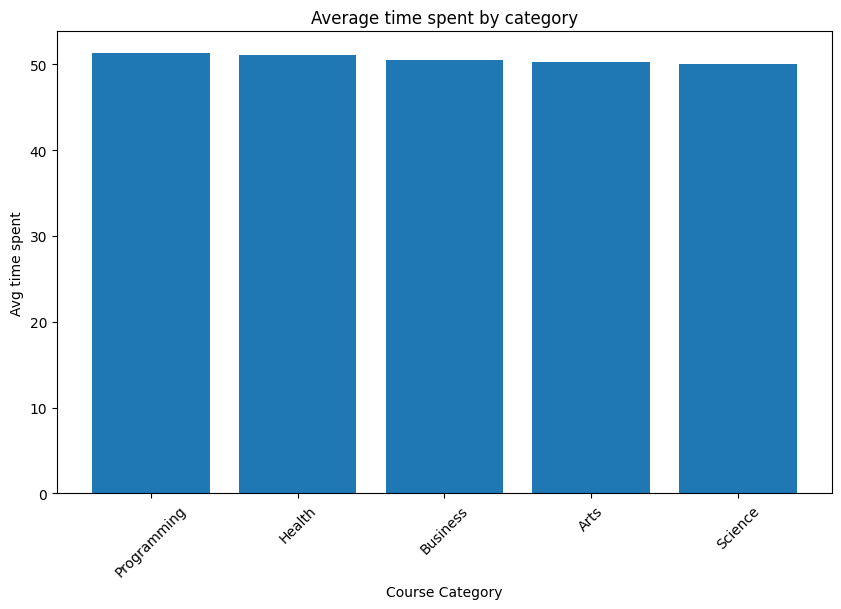

Average time spent by category:
CourseCategory
Programming    51.270740
Health         51.058388
Business       50.470236
Arts           50.226642
Science        49.998186
Name: TimeSpentOnCourse, dtype: float64


In [74]:
#Average time spent on the courses
course_category_time = df.groupby('CourseCategory')['TimeSpentOnCourse'].mean().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(course_category_time.index, course_category_time.values)
plt.title('Average time spent by category')
plt.xlabel('Course Category')
plt.ylabel('Avg time spent')
plt.xticks(rotation=45)
plt.show()
print('Average time spent by category:')
print(course_category_time)

In [ ]:
Programming and Health take the top 2 positions in the average time spent by the users on the courses

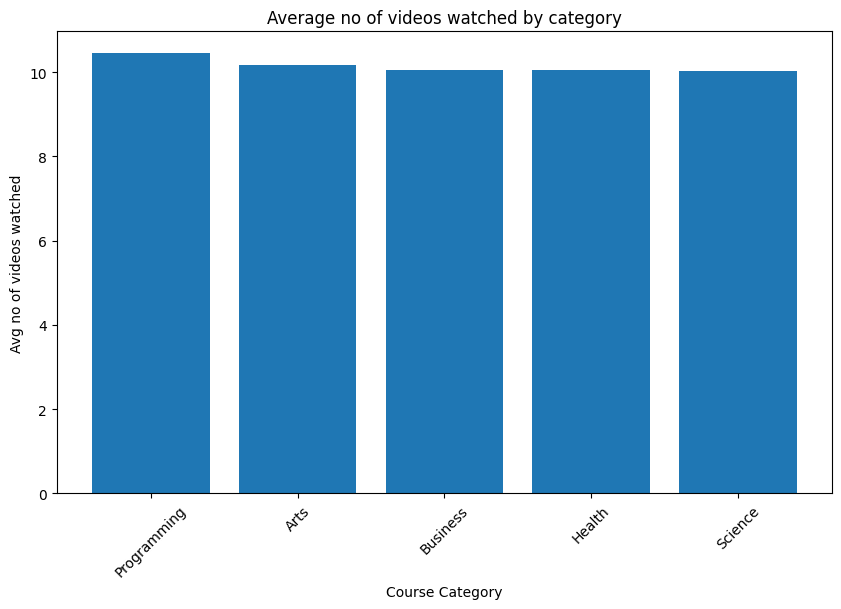

Average no of videos watched by category:
CourseCategory
Programming    10.444581
Arts           10.178344
Business       10.057936
Health         10.042840
Science        10.019030
Name: NumberOfVideosWatched, dtype: float64


In [75]:
#Average no of videos watched
no_of_videos = df.groupby('CourseCategory')['NumberOfVideosWatched'].mean().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(no_of_videos.index, no_of_videos.values)
plt.title('Average no of videos watched by category')
plt.xlabel('Course Category')
plt.ylabel('Avg no of videos watched')
plt.xticks(rotation=45)
plt.show()
print('Average no of videos watched by category:')
print(no_of_videos)

In [ ]:
On an average,the number of videos watched by the users is 10 across all the course categories

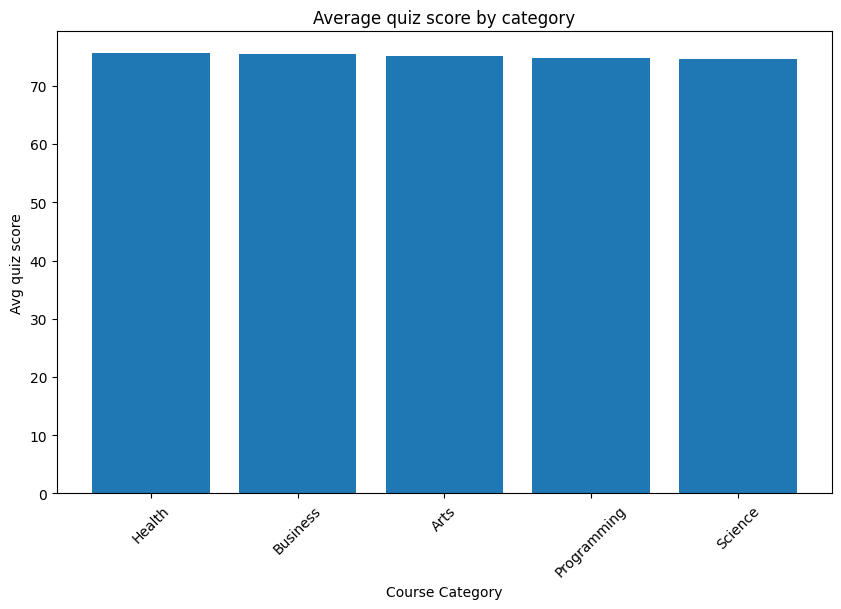

Average quiz score by category:
CourseCategory
Health         75.565310
Business       75.426449
Arts           75.065091
Programming    74.774618
Science        74.616567
Name: QuizScores, dtype: float64


In [76]:
##QuizScores
quiz_score = df.groupby('CourseCategory')['QuizScores'].mean().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(quiz_score.index, quiz_score.values)
plt.title('Average quiz score by category')
plt.xlabel('Course Category')
plt.ylabel('Avg quiz score')
plt.xticks(rotation=45)
plt.show()
print('Average quiz score by category:')
print(quiz_score)

In [ ]:
Courses in Health and Business have slightly high average scores compared to Arts,Programming and Science.

In [ ]:
df.corr()["CourseCompletion"]

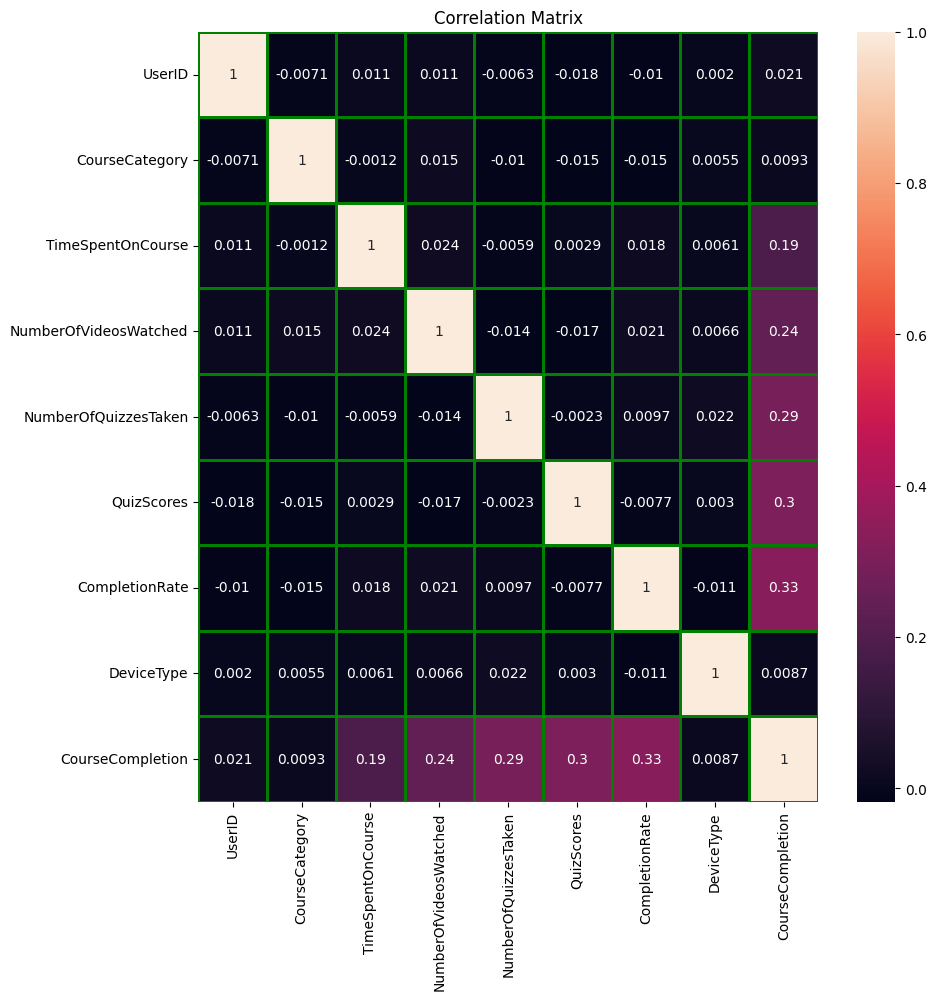

In [49]:
#Finding correlation among multiple features
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),linewidths=2,linecolor ="green",annot=True)
plt.title('Correlation Matrix')
plt.show()

Course category and device type have no impact on the course completion 

In [ ]:
#Mapping the course categories to numerical values
df["CourseCategory"].replace(["Business", "Health", "Science","Programming","Arts"], [0,1,2,3,4], inplace=True)

##Model building##

The following binary classification algorithms are used for model building and evaluated on various performance metrics used for classification algorithms:
--->Logistic Regression
--->Naives Baye Classifier
--->k Nearest Neighbors
--->CatBoost Classifier
--->RandomForest Classifier

Train Accuracy:79.19
Test Accuracy:78.78
Precision:77.60
Recall:72.65
F1 score:75.04


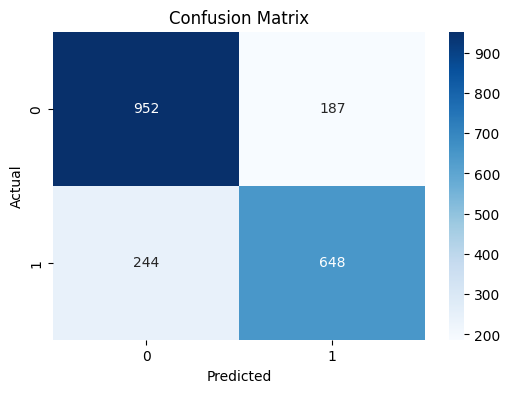


 
Classification Report 

               precision    recall  f1-score   support

not completed       0.80      0.84      0.82      1139
    completed       0.78      0.73      0.75       892

     accuracy                           0.79      2031
    macro avg       0.79      0.78      0.78      2031
 weighted avg       0.79      0.79      0.79      2031



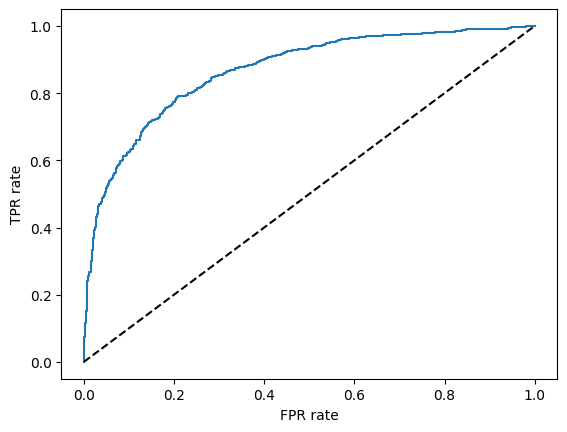

AUC score:0.87


In [42]:
#Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

feature_cols = ["CourseCategory","DeviceType","TimeSpentOnCourse","NumberOfVideosWatched",
       "NumberOfQuizzesTaken", "QuizScores", "CompletionRate"]
X = df[feature_cols] 
y = df["CourseCompletion"]


#Splitting the dataset into training and test set (75%training and 25% test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)


##Feature Scaling of training and test datasets to have a common scale
scaler = StandardScaler()

##Transforming the training and test data using Standard scaler
X_train_norm = scaler.fit_transform(X_train)
X_test_norm=scaler.transform(X_test)

##Creating logistic regression model object
logreg=LogisticRegression()
logreg.fit(X_train_norm,y_train)

##Training dataset predictions
y_pred_train=logreg.predict(X_train_norm)

##Using the trained model to make predictions on the test  dataset
y_pred=logreg.predict(X_test_norm)


# Print the performance metrics for the model
print(f"Train Accuracy:{accuracy_score(y_train,y_pred_train)*100:.2f}")    
print(f"Test Accuracy:{accuracy_score(y_test,y_pred)*100:.2f}") 
print(f"Precision:{precision_score(y_test,y_pred)*100:.2f}") 
print(f"Recall:{recall_score(y_test,y_pred)*100:.2f}") 
print(f"F1 score:{f1_score(y_test,y_pred)*100:.2f}") 
    

#Print confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

       
#Print classification report
print("\n \nClassification Report \n")
target= ['not completed', 'completed']
print(classification_report(y_test,y_pred,target_names=target))  

##Plot ROC curve

y_pred_prob=logreg.predict_proba(X_test_norm)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr)
plt.xlabel("FPR rate")
plt.ylabel("TPR rate")
plt.plot([0,1],[0,1],'k--')
plt.show()

##AUC score
auc_score=roc_auc_score(y_test,y_pred_prob)
print(f"AUC score:{auc_score:.2f}")


            
    
    


##Observations from the logistic regression model evaluation metrics results

The training and test accuracies are almost close enough which indicates that the model is not overfitting and also the AUC score 0.87 indicates that the model is peforming better than just randomly guessing the class labels.There's an 87% chance that the model will be able to correctly distinguish between the positive and negative class.

Train Accuracy:0.8251805646749836
Test Accuracy:0.8257016248153619
Precision score:0.8396464646464646
Recall score:0.7455156950672646
F1 score:0.7897862232779097

 
Classification Report 

               precision    recall  f1-score   support

not completed       0.82      0.89      0.85      1139
    completed       0.84      0.75      0.79       892

     accuracy                           0.83      2031
    macro avg       0.83      0.82      0.82      2031
 weighted avg       0.83      0.83      0.82      2031



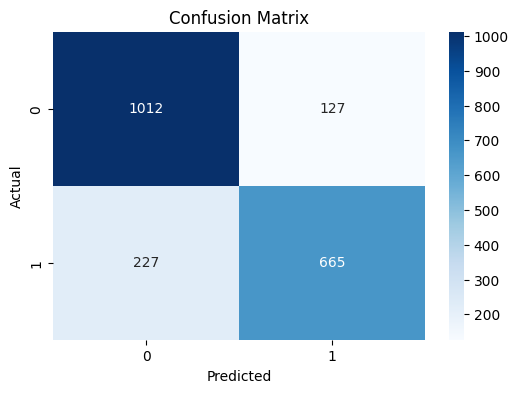

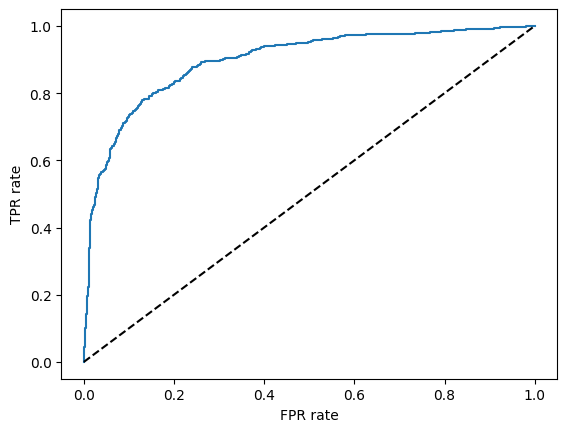

AUC score:0.90


In [48]:
#Naives Baye Classifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score,roc_curve
from sklearn.preprocessing import StandardScaler
# import matplotlib.pyplot as plt

feature_cols = ["CourseCategory","DeviceType","TimeSpentOnCourse","NumberOfVideosWatched",
       "NumberOfQuizzesTaken", "QuizScores", "CompletionRate"]
X = df[feature_cols] 
y = df["CourseCompletion"]

#Splitting the datset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42,stratify=y)

##Feature Scaling (numerical feature values are rescaled)
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#Creating an instance of NB model
naives=GaussianNB()
naives.fit(X_train,y_train)
y_pred=naives.predict(X_test)
y_pred_train=naives.predict(X_train)

#Print the performance score for the model
print(f"Train Accuracy:{accuracy_score(y_train,y_pred_train)}")    
print(f"Test Accuracy:{accuracy_score(y_test,y_pred)}")  
print(f"Precision score:{precision_score(y_test,y_pred)}") 
print(f"Recall score:{recall_score(y_test,y_pred)}")  
print(f"F1 score:{f1_score(y_test,y_pred)}")  
    
#Print classification report
print("\n \nClassification Report \n")
target= ['not completed', 'completed']
print(classification_report(y_test,y_pred,target_names=target))  


#Print confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

##Plot ROC curve
y_pred_prob=naives.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr)
plt.xlabel("FPR rate")
plt.ylabel("TPR rate")
plt.plot([0,1],[0,1],'k--')
plt.show()

##AUC score
auc_score=roc_auc_score(y_test,y_pred_prob)
print(f"AUC score:{auc_score:.2f}")

            
    
    


Best hyperparameters: {'max_depth': 10, 'n_estimators': 500}
Best score: 0.9581400385296664
Train Accuracy:0.9652002626395273
Test Accuracy:0.9566715903495815
Precision: 0.969626168224299
Recall: 0.9304932735426009
F1: 0.9496567505720823

 
Classification Report 

               precision    recall  f1-score   support

not completed       0.95      0.98      0.96      1139
    completed       0.97      0.93      0.95       892

     accuracy                           0.96      2031
    macro avg       0.96      0.95      0.96      2031
 weighted avg       0.96      0.96      0.96      2031



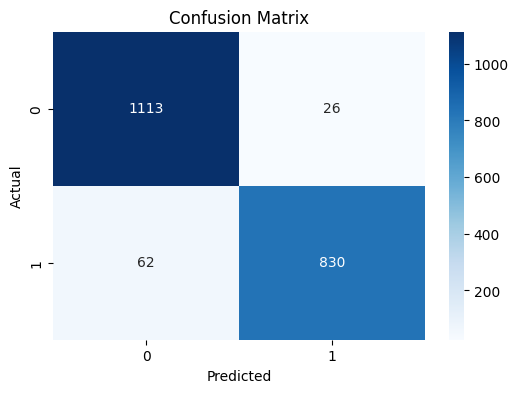

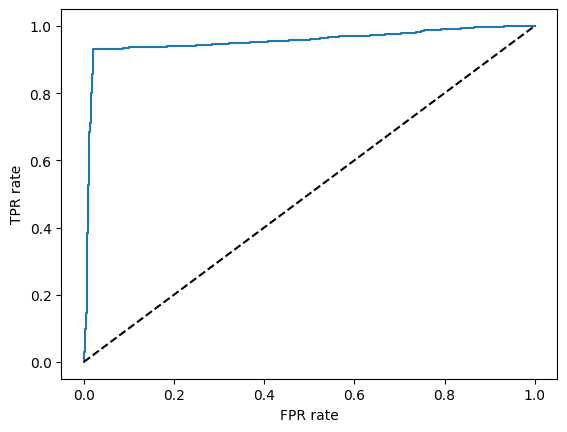

AUC score:0.95


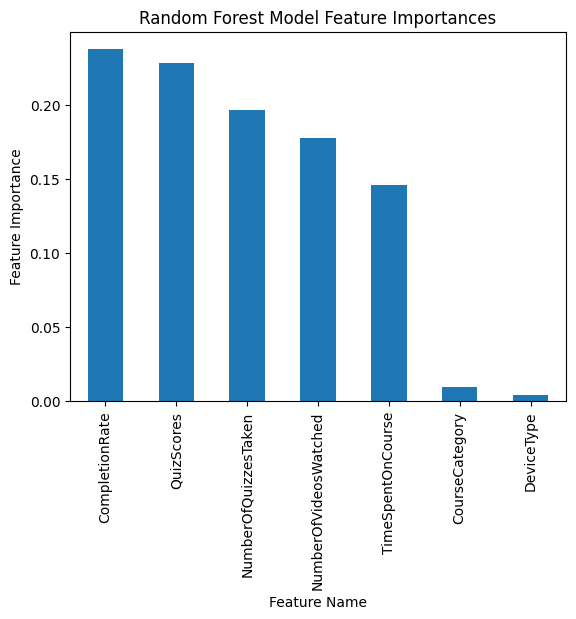

In [50]:
#RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,roc_curve,roc_auc_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

feature_cols = ["CourseCategory","DeviceType","TimeSpentOnCourse","NumberOfVideosWatched",
       "NumberOfQuizzesTaken", "QuizScores", "CompletionRate"]
X = df[feature_cols] 
y = df["CourseCompletion"]

# Splitting the dataset into training and test sets (75% training and 25% test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)

#Feature scaling of training and test sets
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#Creating an instance of Random forest model
model= RandomForestClassifier()

#Using GridSearchCV for selecting the best model to train the data
param_values = {'n_estimators': [10,25,50,100,500],'max_depth':[3,6,10,15]}
grid_search = GridSearchCV(model, param_grid=param_values,cv=6, scoring='accuracy')

#Fit the grid search object to the data
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

#Creating a variable for the best model
best_rf=grid_search.best_estimator_

#Generate predictions with the best model on the test and training sets
y_pred=best_rf.predict(X_test)
y_pred_train=best_rf.predict(X_train)

#Print the performance metrics of the model
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

print(f"Train Accuracy:{accuracy_score(y_train,y_pred_train)}")    
print(f"Test Accuracy:{accuracy_score(y_test,y_pred)}")   
print("Precision:",precision)
print("Recall:",recall)
print("F1:",f1)

    
#Print classification report
print("\n \nClassification Report \n")
target= ['not completed', 'completed']
print(classification_report(y_test,y_pred,target_names=target))  


#Print confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

##Plot ROC curve
y_pred_prob=best_rf.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr)
plt.xlabel("FPR rate")
plt.ylabel("TPR rate")
plt.plot([0,1],[0,1],'k--')
plt.show()

##AUC score
auc_score=roc_auc_score(y_test,y_pred_prob)
print(f"AUC score:{auc_score:.2f}")

#Plot the feature importances
feature_importances = pd.Series(best_rf.feature_importances_, index=feature_cols).sort_values(ascending=False)
# plt.bar(X_train.columns, best_rf.feature_importances_)
feature_importances.plot.bar()
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.title('Random Forest Model Feature Importances')
plt.show()






    
            
    




From the above bar chart,it can be seen that the completion rate and quiz scores features have been been the top 2 most important features contributing to the prediction of the course completion status

##Observations from RandomForestClassifier evaluation metrics result
The model performs well on both the training and tests sets with train accuracy and test accuracy being close to 96% and also the AUC score 0.95 indicates that the model is good at correctly classifying the labels.The optimal parameters of the model after hyperparameter tuning  are found to be 6 for max_depth and 500 for n_estimators parameters

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Best k-value: 17
Best score: 0.8751717775798447
Accuracy: 0.8738461538461538
Precision: 0.8609929078014185
Recall: 0.8501400560224089
F1 score: 0.8555320648343904


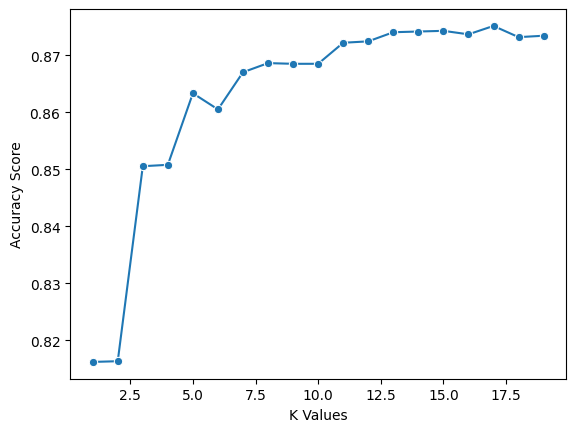

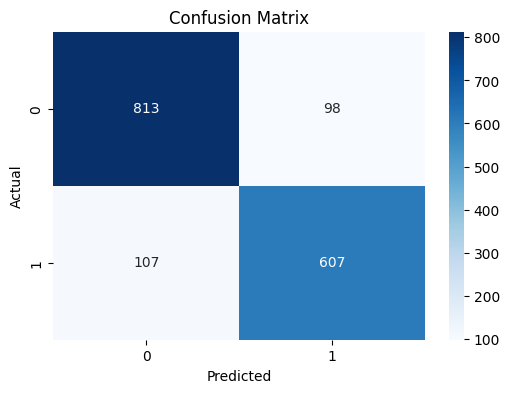


 
Classification Report 

               precision    recall  f1-score   support

not completed       0.88      0.89      0.89       911
    completed       0.86      0.85      0.86       714

     accuracy                           0.87      1625
    macro avg       0.87      0.87      0.87      1625
 weighted avg       0.87      0.87      0.87      1625



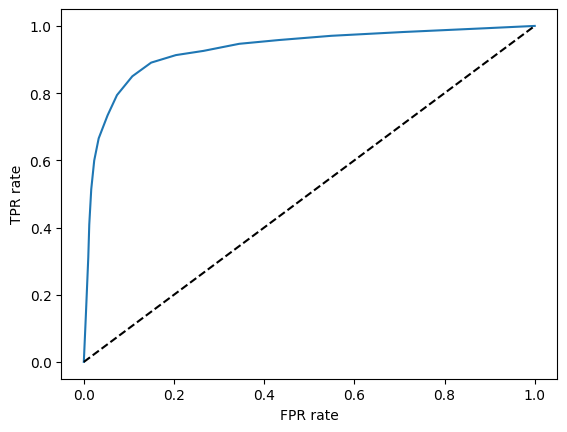

AUC score:0.93


In [36]:
##K-Nearest Neighbours
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

feature_cols = ["CourseCategory","DeviceType","TimeSpentOnCourse","NumberOfVideosWatched",
       "NumberOfQuizzesTaken", "QuizScores", "CompletionRate"]
X = df[feature_cols] 
y = df["CourseCompletion"]


##Feature Scaling of the dataset to have a common scale (to avoid features with high value to influence the model prediction )
scaler = StandardScaler()
X_norm=scaler.fit_transform(X)


##Performing cross validation to get the best k value for the model
scores=[]

for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn,X_norm,y,cv=10)
    scores.append(np.mean(score))
    


##Plot the k-values against accuracy using lineplot    
sns.lineplot(x=range(1,20),y=scores,marker='o')    
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

##Finding the best k value
best_score = max(scores)
best_k = scores.index(best_score)+1
print("Best k-value:",best_k)
print("Best score:",best_score)

##Using the best k value to build the model
knn = KNeighborsClassifier(n_neighbors=best_k)

##Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,stratify=y)

##Feature Scaling of the dataset to have a common scale
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1=f1_score(y_test,y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:",f1)
    

#Print confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

       
#Print classification report
print("\n \nClassification Report \n")
target= ['not completed', 'completed']
print(classification_report(y_test,y_pred,target_names=target))  

##Plot ROC curve

y_pred_prob=knn.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr)
plt.xlabel("FPR rate")
plt.ylabel("TPR rate")
plt.plot([0,1],[0,1],'k--')
plt.show()

##AUC score
auc_score=roc_auc_score(y_test,y_pred_prob)
print(f"AUC score:{auc_score:.2f}")

In [ ]:
##Observations from the kNN model results##
The optimal k value for the model is found to be 17 and beyond 20 the model performance degraded.The best score achieved after hyperparameter tuning was around 87% and the AUC score 0.93 indicates that the model performance is good

0:	learn: 0.5813803	total: 2.41ms	remaining: 0us
0:	learn: 0.5809678	total: 2.23ms	remaining: 0us
0:	learn: 0.5798904	total: 2.27ms	remaining: 0us
0:	learn: 0.5787867	total: 2.54ms	remaining: 0us
0:	learn: 0.5810732	total: 2.33ms	remaining: 0us
0:	learn: 0.6740712	total: 1.43ms	remaining: 2.86ms
1:	learn: 0.6558134	total: 3.1ms	remaining: 1.55ms
2:	learn: 0.6385915	total: 4.43ms	remaining: 0us
0:	learn: 0.6739908	total: 1.4ms	remaining: 2.8ms
1:	learn: 0.6560127	total: 2.9ms	remaining: 1.45ms
2:	learn: 0.6388003	total: 4.29ms	remaining: 0us
0:	learn: 0.6738720	total: 1.43ms	remaining: 2.86ms
1:	learn: 0.6552017	total: 2.98ms	remaining: 1.49ms
2:	learn: 0.6381118	total: 4.36ms	remaining: 0us
0:	learn: 0.6736596	total: 1.45ms	remaining: 2.9ms
1:	learn: 0.6552749	total: 2.79ms	remaining: 1.4ms
2:	learn: 0.6380250	total: 4.2ms	remaining: 0us
0:	learn: 0.6740496	total: 1.41ms	remaining: 2.82ms
1:	learn: 0.6554737	total: 2.81ms	remaining: 1.41ms
2:	learn: 0.6384861	total: 4.13ms	remaining: 0

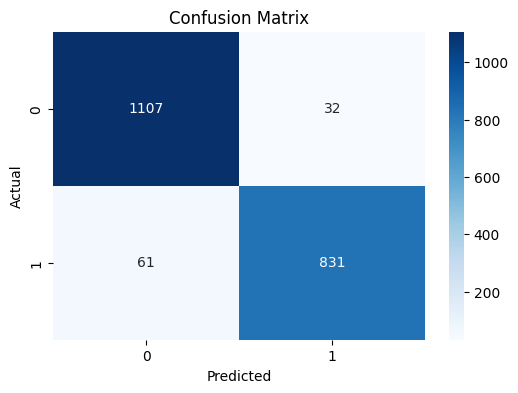

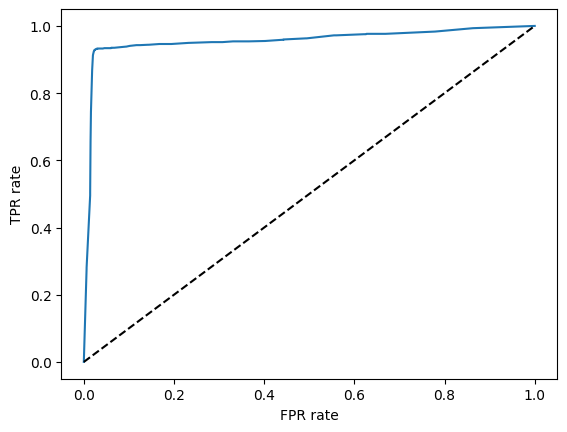

AUC score:0.96


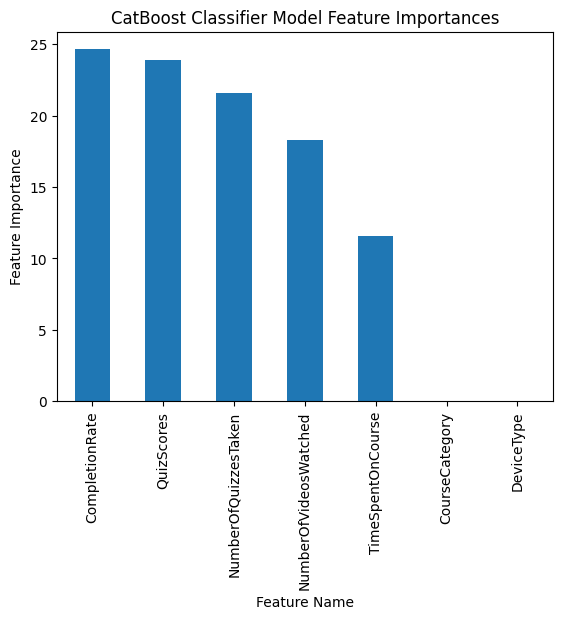

In [32]:
##Catboost Classifier
import catboost as cb
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,roc_curve,roc_auc_score
from sklearn import metrics
from scipy.stats import randint, uniform
import matplotlib.pyplot as plt
import seaborn as sns

feature_cols = ["CourseCategory","DeviceType","TimeSpentOnCourse","NumberOfVideosWatched",
       "NumberOfQuizzesTaken", "QuizScores", "CompletionRate"]
X = df[feature_cols] 
y = df["CourseCompletion"]

# Splitting the dataset into training and test sets (75% training and 25% test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)


#Creating an instance of CatBoost model
model= CatBoostClassifier()

##Creating a dictionary of hyperparameters to be tuned
catboost_param_dist = {
    'depth': randint(4, 10),
    'learning_rate': uniform(0.01, 0.3),
    'l2_leaf_reg': randint(1, 10),
    'iterations': randint(1,5)
    
}

#Fit the random search object to the data
random_search=RandomizedSearchCV(estimator=model,param_distributions=catboost_param_dist,cv=5,random_state=42)
random_search.fit(X_train, y_train)
print("Best hyperparameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

#Creating a variable for the best model
best_model=random_search.best_estimator_

#Generate predictions with the best model on the test and training sets
y_pred=best_model.predict(X_test)
y_pred_train=best_model.predict(X_train)

#Print the performance metrics of the model
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

print(f"Train Accuracy:{accuracy_score(y_train,y_pred_train)}")    
print(f"Test Accuracy:{accuracy_score(y_test,y_pred)}")   
print("Precision:",precision)
print("Recall:",recall)
print("F1:",f1)

    
#Print classification report
print("\n \nClassification Report \n")
target= ['not completed', 'completed']
print(classification_report(y_test,y_pred,target_names=target))  


#Print confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

##Plot ROC curve
y_pred_prob=best_model.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr)
plt.xlabel("FPR rate")
plt.ylabel("TPR rate")
plt.plot([0,1],[0,1],'k--')
plt.show()

##AUC score
auc_score=roc_auc_score(y_test,y_pred_prob)
print(f"AUC score:{auc_score:.2f}")

#Plot the feature importances
feature_importances = pd.Series(best_model.feature_importances_, index=feature_cols).sort_values(ascending=False)

# plt.bar(X_train.columns, best_rf.feature_importances_)
feature_importances.plot.bar()
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.title('CatBoost Classifier Model Feature Importances')
plt.show()






    
            
    




In [ ]:
##Observations from the evaluation metrics of Catboost model
The model achieved an accuracy of 95% on both training and test sets with an AUC score of 0.96 which shows that the model performs well on the training data and also generalizes well on unseen test data.Best hyperparameters found after RandomizedSearchCV are {'depth': 5, 'iterations': 4, 'l2_leaf_reg': 9, 'learning_rate': 0.2996896099223678}.
It is also found that completion rate and quiz scores features contributed to the model prediction of completion status 